In [6]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
import pandas as pd

### Creating same plot as below but for first 577m. Using Data provided by Sigl. 

In [2]:
xlow = 400
xhigh= 405
lim = False

In [3]:
#pull layer count #######

wd_layer_count = pd.read_csv('WD2014 Layer Count.tab', comment="#", delimiter="\t", names=["Depth ice/snow [m]", "Cal age [ka BP] (ice age)", "Cal age std e [±] (ice age uncertainty due to an...)", "Cal age std e [±] (ice age uncertainty due to CH...)", "Gas age [ka BP] (gas age)", "Age e [±] (gas age uncertainty (2 sigma))",	"Age diff [ka] (gas age-ice age difference (d...)",	"Age diff e [±] (delta age uncertainty (2 sigma))"])
wd_layer_count["Cal age [ka BP] (ice age)"] = wd_layer_count["Cal age [ka BP] (ice age)"]*1000

#pull the ion data #######

early_ion_path='WD Layer Counting Files/Sigl2015_SOM4_Antarctica.xlsx'

all_cols = cols_to_check = ["BC", "Na", "Sr", "nssS", "nssS_Na_ratio", "Br", "nh4", "nssCa"]
early_read_ion = pd.read_excel(early_ion_path, header=None, sheet_name='1 - WDC06A_layer_count', skiprows=1, names=["Depth_m", "Depth_mweq",	"Decimal_Year_CE",	"BC",	"Na",	"Sr",	"nssS",	"nssS_Na_ratio", "Br",	"nh4",	"nssCa"])

for col in all_cols: #remove data > -3
    early_read_ion[col]=early_read_ion[col].mask(early_read_ion[col] < -3)

early_dep_path = '/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision/WD Layer Counting Files/DRI_0_577m_032217.txt'
early_read_dep = pd.read_csv(early_dep_path, delimiter="\t")
early_read_dep['Cond(uS)']=early_read_dep['Cond(uS)'].mask(early_read_dep['Cond(uS)'] < 0)

#pull the volcanic layer data
volcanic_path='/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision/WDC_GICC21_Compare.tab'
read_volcanic = pd.read_csv(volcanic_path, delimiter="\t", comment="#") #take the vals
volcanic_wd_meters = read_volcanic["WDC(m)"]


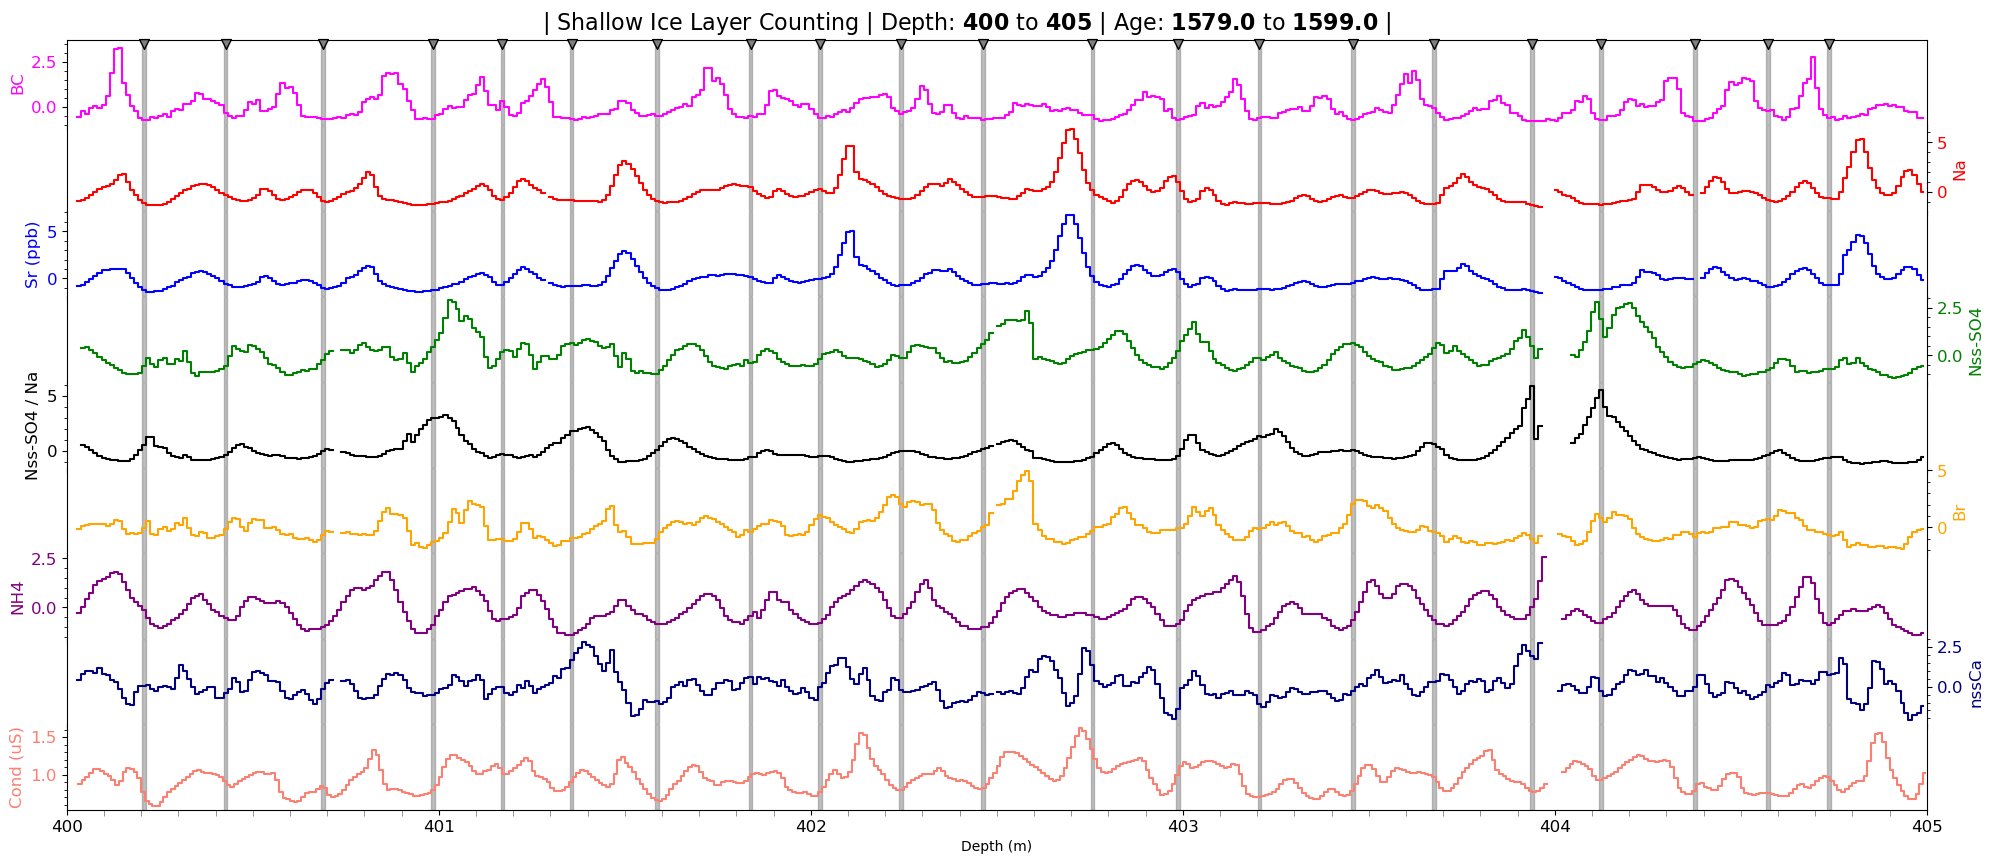

In [ ]:
#create plot

#setting ion data ranges
early_read_ion = early_read_ion[early_read_ion['Depth_m'] > xlow]
early_read_ion = early_read_ion[early_read_ion['Depth_m'] < xhigh]

#setting dep data ranges
early_read_dep = early_read_dep[early_read_dep['Depth(m)'] > xlow]
early_read_dep = early_read_dep[early_read_dep['Depth(m)'] < xhigh]

# Create vertically stacked plots
fig, ax = plt.subplots(9, 1, figsize=(24, 10), sharex=True)

labelfontsize = 12 # Set label font size

# Plot 1: Black Carbon (magenta)
ax[0].step(early_read_ion["Depth_m"], early_read_ion["BC"], where='mid', color='magenta', clip_on=False)
ax[0].set_ylabel("BC", color='magenta', fontsize=labelfontsize)
ax[0].tick_params(axis='y', labelcolor='magenta')

# Plot 2: Na (red)

ax[1].step(early_read_ion["Depth_m"], early_read_ion["Na"], where='mid', color='red', clip_on=False) #allowing spillover
ax[1].set_ylabel("Na", color='red', fontsize=labelfontsize)
ax[1].tick_params(axis='y', labelcolor='red')
ax[1].yaxis.set_label_position("right") #move to right
ax[1].yaxis.tick_right()

# Plot 3: Sr (blue)
ax[2].step(early_read_ion["Depth_m"], early_read_ion["Sr"], where='mid', color='blue', clip_on=False) #allowing spillover
ax[2].set_ylabel("Sr (ppb)", color='blue', fontsize=labelfontsize) 
ax[2].tick_params(axis='y', labelcolor='blue')

# Plot 4: nssS (blue)
ax[3].step(early_read_ion["Depth_m"], early_read_ion["nssS"], where='mid', color='green', clip_on=False) #allowing spillover
ax[3].set_ylabel("Nss-SO4", color='green', fontsize=labelfontsize) 
ax[3].tick_params(axis='y', labelcolor='green')
ax[3].yaxis.set_label_position("right") #move to right
ax[3].yaxis.tick_right()

# Plot 5: nssS / Na (black)
ax[4].step(early_read_ion["Depth_m"], early_read_ion["nssS_Na_ratio"], where='mid', color='black', clip_on=False) #allowing spillover
ax[4].set_ylabel("Nss-SO4 / Na", color='black', fontsize=labelfontsize) 
ax[4].tick_params(axis='y', labelcolor='black')

# Plot 6: Br (orange)
ax[5].step(early_read_ion["Depth_m"], early_read_ion["Br"], where='mid', color='orange', clip_on=False) #allowing spillover
ax[5].set_ylabel("Br", color='orange', fontsize=labelfontsize) 
ax[5].tick_params(axis='y', labelcolor='orange')
ax[5].yaxis.set_label_position("right") #move to right
ax[5].yaxis.tick_right()

# Plot 7: NH4 (purple)
ax[6].step(early_read_ion["Depth_m"], early_read_ion["nh4"], where='mid', color='purple', clip_on=False) #allowing spillover
ax[6].set_ylabel("NH4", color='purple', fontsize=labelfontsize) 
ax[6].tick_params(axis='y', labelcolor='purple')

# Plot 8: nssCa (navy)
ax[7].step(early_read_ion["Depth_m"], early_read_ion["nssCa"], where='mid', color='navy', clip_on=False) #allowing spillover
ax[7].set_ylabel("nssCa", color='navy', fontsize=labelfontsize) 
ax[7].tick_params(axis='y', labelcolor='navy')
ax[7].yaxis.set_label_position("right") #move to right
ax[7].yaxis.tick_right()

# Plot 9: Conductivity (salmon)
ax[8].step(early_read_dep["Depth(m)"], early_read_dep["Cond(uS)"], color='salmon', where='mid', clip_on=False) #allowing spillover
ax[8].set_ylabel("Cond (uS)", color='salmon', fontsize=labelfontsize) 
ax[8].tick_params(axis='y', labelcolor='salmon')


#set solid lines for layers
for axes in ax: # all axes
    for depth in wd_layer_count["Depth ice/snow [m]"]:
        if xlow < depth < xhigh:
            axes.axvspan(depth - 0.005, depth + 0.005, color='grey', alpha=0.5)
    axes.tick_params(axis='both', labelsize=12) # Set tick label size

#add black for volcanic links
for axes in ax: # all axes
    i=0
    for link in volcanic_wd_meters:
        if xlow < link < xhigh:
            axes.axvline(link, color='black', linestyle='--', linewidth=2)
        i += 1

age_in_bounds=[]
s=0
for depth in wd_layer_count["Depth ice/snow [m]"]:
    if xlow < depth < xhigh:
        age_in_bounds.append(wd_layer_count["Cal age [ka BP] (ice age)"][s])
    s+=1

for axes in ax[:-1]:  # All except the bottom plot
    axes.tick_params(labelbottom=False)        # Hide x-axis tick labels
    axes.spines['bottom'].set_visible(False)# Hide x-axis spine

for axes in ax[1:]: #all except top plot
    axes.spines['top'].set_visible(False) 

#add triangles
triangle_positions = wd_layer_count["Depth ice/snow [m]"]
triangle_positions = triangle_positions[(triangle_positions > xlow) & (triangle_positions < xhigh)]
# Y position slightly above the top plot's y-limits
y_top = ax[0].get_ylim()[1] + 0.03  # Adjust as needed
ax[0].scatter(triangle_positions, [y_top]*len(triangle_positions), marker='v', color='grey', edgecolors='black', s=50, zorder=5, clip_on=False)

# Set shared X axis
ax[-1].set_xlim(xlow, xhigh)
ax[-1].set_xlabel("Depth (m)")

for axes in ax: #add minor ticks
    axes.minorticks_on()
    axes.xaxis.set_minor_locator(MultipleLocator(0.1))  # Minor ticks every 0.1 on x-axis
    axes.tick_params(axis='x', which='minor', length=4, color='gray')
    
plt.subplots_adjust(hspace=0)
plt.suptitle(rf"| Shallow Ice Layer Counting | Depth: $\bf{{{xlow}}}$ to $\bf{{{xhigh}}}$ | Age: $\bf{{{min(age_in_bounds)}}}$ to $\bf{{{max(age_in_bounds)}}}$ |", fontsize=16, y=0.91)
plt.show()

## Recreating WD2014 p2 Fig4

Here I recreate the plot figure.
Cell 1 = Pulling data
Cell 2 = Creating plot

In [2]:
### set params

xlow = 619.32996
xhigh= 624
lim = False

In [ ]:
#pull layer count #######

wd_layer_count = pd.read_csv('WD2014 Layer Count.tab', comment="#", delimiter="\t", names=["Depth ice/snow [m]", "Cal age [ka BP] (ice age)", "Cal age std e [±] (ice age uncertainty due to an...)", "Cal age std e [±] (ice age uncertainty due to CH...)", "Gas age [ka BP] (gas age)", "Age e [±] (gas age uncertainty (2 sigma))",	"Age diff [ka] (gas age-ice age difference (d...)",	"Age diff e [±] (delta age uncertainty (2 sigma))"])
wd_layer_count["Cal age [ka BP] (ice age)"] = wd_layer_count["Cal age [ka BP] (ice age)"]*1000

#pull the DEP data files for the brittle ice #######

dep_brittle_tab=["0550RA.d50", "0550RB.d50"]
dep_brittle_tab_paths = [f'WD Layer Counting Files/DEP files brittle ice/{file}' for file in dep_brittle_tab]
dep_brittle_comma=["0600S.d50", "0650S.d50", "0700S.d50", "0750S.d50", "0800S.d50", "0850S.d50", "0900S.d50", "0950S.d50", "1000S.d50", "1050S.d50", "1100S.d50", "1150S.d50", "1200S.d50", "1250S.d50", "1300S.d50"]
dep_brittle_comma_paths = [f'WD Layer Counting Files/DEP files brittle ice/{file}' for file in dep_brittle_comma]

read_dep = []

for path in dep_brittle_tab_paths: #appends data with comma delims
    with open(path) as f: #determine how big header
        for i, line in enumerate(f):
            if "END HEADER" in line:
                start_line = i + 1  # Start after this line + 0 for no header
                break
    data = pd.read_csv(path, skiprows=start_line, header=None, sep=r'\s+', names=["Depth(m)", "Conductance(uS)"])
    read_dep.append(data)

for path in dep_brittle_comma_paths: #appends data with comma delims
    with open(path) as f: #determine how big header
        for i, line in enumerate(f):
            if "END HEADER" in line:
                start_line = i + 2  # Start after this line + 1 for header
                break
    data = pd.read_csv(path, skiprows=start_line, header=None, sep=',', names=["Depth(m)", "Conductance(uS)"])
    read_dep.append(data)

read_dep = pd.concat(read_dep, ignore_index=True)

#pull the ion data #######

ion_path='WD Layer Counting Files/WDC06A 577-1300 m Chemistry.xlsx'

read_ion = pd.read_excel(ion_path, header=None, skiprows=5, names=['Depth(m)', "Cl(ng/g)", "NO3(ng/g)", "SO4(ng/g)", "Na(ng/g)", "K(ng/g)", "Mg(ng/g)", "Ca(ng/g)"])

#pull the uncertainty data

uncertainty_path='WD Layer Counting Files/UncertaintyLayers.txt'
read_uncertainty = pd.read_csv(uncertainty_path, header=None, delimiter="\t", comment="#", names=["May Be", "May Not Be"]) #take the vals

first_values = np.array([ 
    int(str(val).split('-')[0]) #splits by - and only keeps the first
    for val in read_uncertainty["May Not Be"].values #where its taking the vals
    if isinstance(val, str) or '-' in str(val) #if val is not None/NaN/must have a -
])

#pull the volcanic layer data
volcanic_path='/Users/quinnmackay/Documents/GitHub/BICC/Holcene Revision/WDC_GICC21_Compare.tab'
read_volcanic = pd.read_csv(volcanic_path, delimiter="\t", comment="#") #take the vals
volcanic_wd_meters = read_volcanic["WDC(m)"]

0     139.13650
1     142.90114
2     182.41005
3     188.45998
4     208.83713
5     223.29808
6     264.10300
7     279.31050
8     325.77286
9     339.46400
10    351.35205
11    359.66140
12    361.01752
13    380.16846
14    423.70557
15    445.54684
16    518.44270
17    523.80320
18    532.68800
19    541.39795
20    568.04070
21    583.83950
22    593.95240
23    619.32996
24    747.65720
25    765.16394
26    799.77060
27    810.31250
28    841.38340
29    845.08386
30    850.73010
Name: WDC(m), dtype: float64

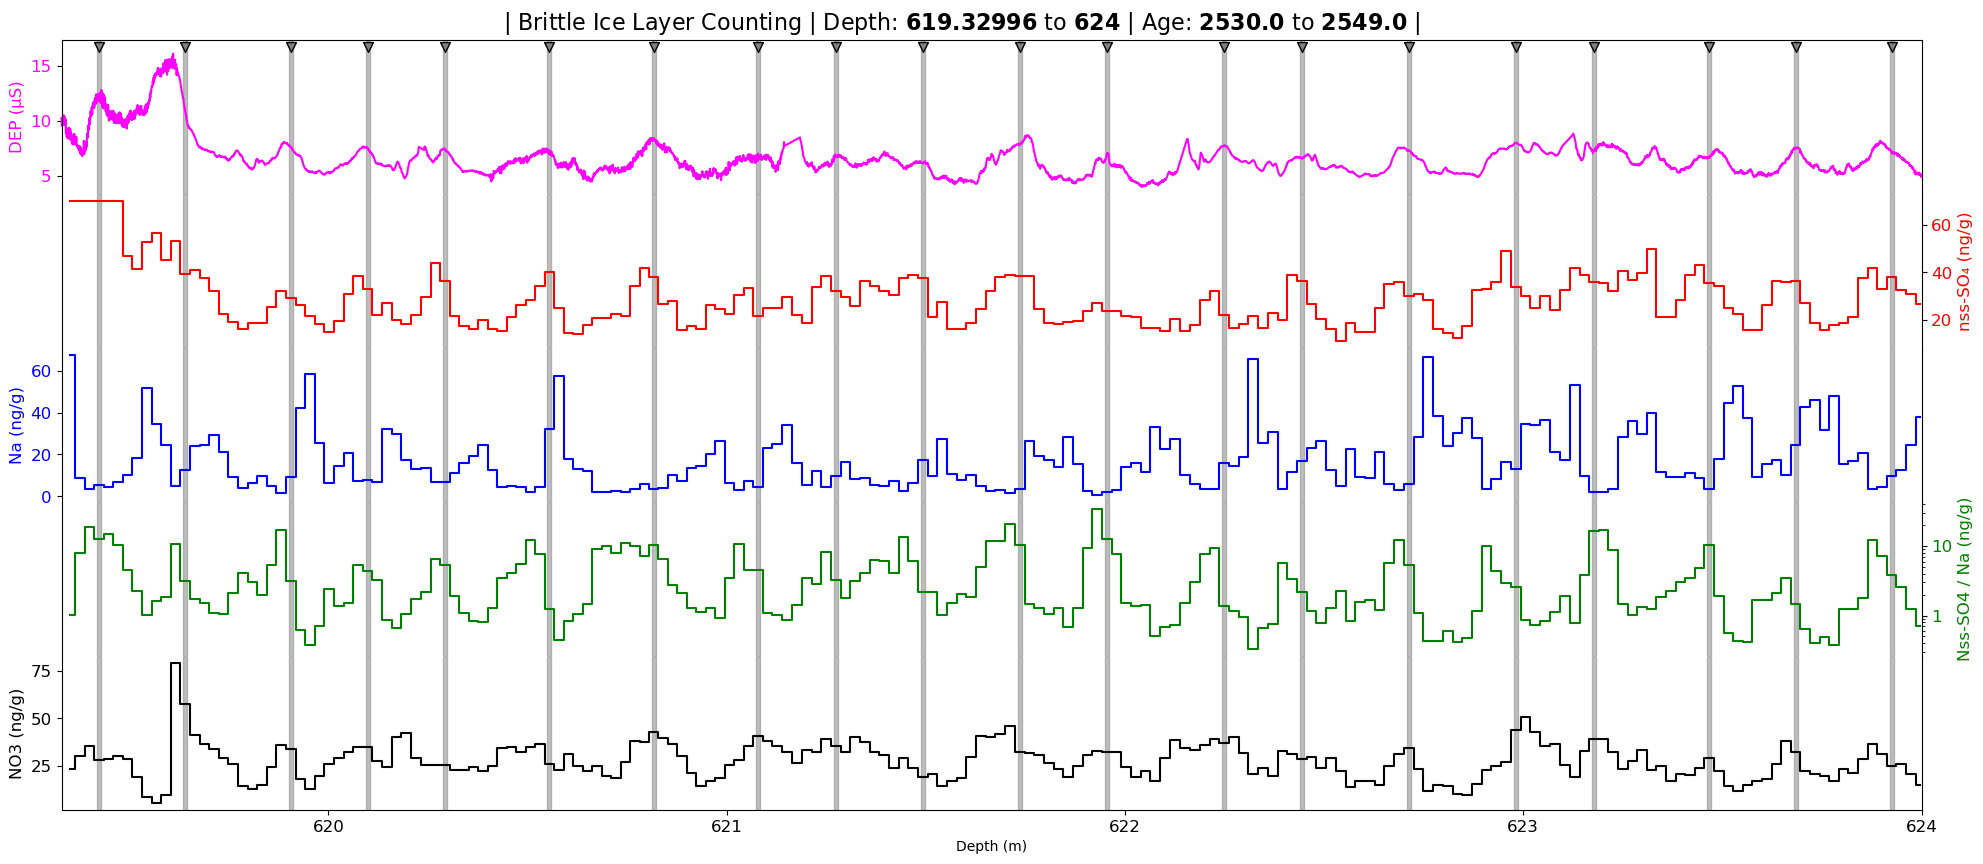

In [ ]:
#create plot
from matplotlib.ticker import ScalarFormatter

#setting DEP data ranges
read_dep = read_dep[read_dep['Depth(m)'] > xlow]
read_dep = read_dep[read_dep['Depth(m)'] < xhigh]

#setting ion data ranges
read_ion = read_ion[read_ion['Depth(m)'] > xlow]
read_ion = read_ion[read_ion['Depth(m)'] < xhigh]

# Create vertically stacked plots
fig, ax = plt.subplots(5, 1, figsize=(24, 10), sharex=True)

labelfontsize = 12 # Set label font size

# Plot 1: DEP (magenta)
ax[0].plot(read_dep["Depth(m)"], read_dep["Conductance(uS)"], color='magenta', clip_on=False)
ax[0].set_ylabel("DEP (µS)", color='magenta', fontsize=labelfontsize)
ax[0].tick_params(axis='y', labelcolor='magenta')

# Plot 2: nss-SO4 (red)

read_ion.loc[read_ion["SO4(ng/g)"] > 70, "SO4(ng/g)"] = 70 # this is just needed so other parts are still visible.

ax[1].step(read_ion["Depth(m)"], read_ion["SO4(ng/g)"], where='mid', color='red', clip_on=False) #allowing spillover
ax[1].set_ylabel("nss-SO₄ (ng/g)", color='red', fontsize=labelfontsize) #assuming it is nss
ax[1].tick_params(axis='y', labelcolor='red')
ax[1].yaxis.set_label_position("right") #move to right
ax[1].yaxis.tick_right()

# Plot 3: Na (blue)
ax[2].step(read_ion["Depth(m)"], read_ion["Na(ng/g)"], where='mid', color='blue', clip_on=False)
ax[2].set_ylabel("Na (ng/g)", color='blue', fontsize=labelfontsize) 
ax[2].tick_params(axis='y', labelcolor='blue')

# Plot 4: nss-SO4/Na (blue)
ax[3].step(read_ion["Depth(m)"], (read_ion["SO4(ng/g)"]/read_ion["Na(ng/g)"]), where='mid', color='green', clip_on=False)
ax[3].set_ylabel("Nss-SO4 / Na (ng/g)", color='green', fontsize=labelfontsize) 
ax[3].tick_params(axis='y', labelcolor='green')
ax[3].set_yscale("log")  # Apply log scale
ax[3].yaxis.set_major_formatter(ScalarFormatter()) # change to normal numbers
ax[3].set_yticks([1, 10])
ax[3].set_yticklabels(["1", "10"]) #set as normal numbers
ax[3].yaxis.set_label_position("right") #move to right
ax[3].yaxis.tick_right()

# Plot 4: NO3 (black)
ax[4].step(read_ion["Depth(m)"], read_ion["NO3(ng/g)"], where='mid', color='black', clip_on=False)
ax[4].set_ylabel("NO3 (ng/g)", color='black', fontsize=labelfontsize) 
ax[4].tick_params(axis='y', labelcolor='black')

if lim == True:
    ax[1].set_ylim(0,65) #setting limits for y axis
    ax[2].set_ylim(0,80) #setting limits for y axis
    ax[4].set_ylim(10,60) #setting limits for y axis
else:
    pass

#set solid lines for layers, changing the color depending on if they are unknown
for axes in ax: # all axes
    i=0
    for depth in wd_layer_count["Depth ice/snow [m]"]:
        if xlow < depth < xhigh:
            if (wd_layer_count["Cal age [ka BP] (ice age)"][i]) in read_uncertainty["May Be"].values:
                axes.axvspan(depth - 0.005, depth + 0.005, color='red', alpha=0.5)
            else:
                axes.axvspan(depth - 0.005, depth + 0.005, color='grey', alpha=0.5)
        i += 1
    axes.tick_params(axis='both', labelsize=12) # Set tick label size

#add black for volcanic links
for axes in ax: # all axes
    i=0
    for link in volcanic_wd_meters:
        if xlow < link < xhigh:
            axes.axvline(link, color='black', linestyle='--', linewidth=2)
        i += 1

#sets the left and right for the may not be shaded areas
may_not_left=[]
may_not_right=[]
age_in_bounds=[]
s=0
for depth in wd_layer_count["Depth ice/snow [m]"]:
    if xlow < depth < xhigh:
        age_in_bounds.append(wd_layer_count["Cal age [ka BP] (ice age)"][s])
        if (wd_layer_count["Cal age [ka BP] (ice age)"][s]) in first_values:
            may_not_left.append(depth)
            may_not_right.append(wd_layer_count["Depth ice/snow [m]"][s+1])
    s+=1

#sets the span for the may not be shaded areas
for axes in ax: # all axes
    for t in range(len(may_not_left)):
        axes.axvspan(may_not_left[t] + 0.005, may_not_right[t] - 0.005, color='orange', alpha=0.5)

for axes in ax[:-1]:  # All except the bottom plot
    axes.tick_params(labelbottom=False)        # Hide x-axis tick labels
    axes.spines['bottom'].set_visible(False)# Hide x-axis spine

for axes in ax[1:]: #all except top plot
    axes.spines['top'].set_visible(False) 

#add triangles
triangle_positions = wd_layer_count["Depth ice/snow [m]"]
triangle_positions = triangle_positions[(triangle_positions > xlow) & (triangle_positions < xhigh)]
# Y position slightly above the top plot's y-limits
y_top = ax[0].get_ylim()[1] + 0.03  # Adjust as needed
ax[0].scatter(triangle_positions, [y_top]*len(triangle_positions), marker='v', color='grey', edgecolors='black', s=50, zorder=5, clip_on=False)

# Set shared X axis
ax[-1].set_xlim(xlow, xhigh)
ax[-1].set_xlabel("Depth (m)")

for axes in ax: #add minor ticks
    axes.minorticks_on()
    axes.xaxis.set_minor_locator(MultipleLocator(0.1))  # Minor ticks every 0.1 on x-axis
    axes.tick_params(axis='x', which='minor', length=4, color='gray')

plt.subplots_adjust(hspace=0)
plt.suptitle(rf"| Brittle Ice Layer Counting | Depth: $\bf{{{xlow}}}$ to $\bf{{{xhigh}}}$ | Age: $\bf{{{min(age_in_bounds)}}}$ to $\bf{{{max(age_in_bounds)}}}$ |", fontsize=16, y=0.91)
plt.show()

